In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-songs/dataset.csv
/kaggle/input/spotify/dataset.csv


In [2]:
df = pd.read_csv('/kaggle/input/dataset-songs/dataset.csv')
df.head(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,...,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,...,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,...,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,...,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,...,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


# **Выдвенем гипотезы**

**1. Предположим что на популярность трека влияет его длительность**

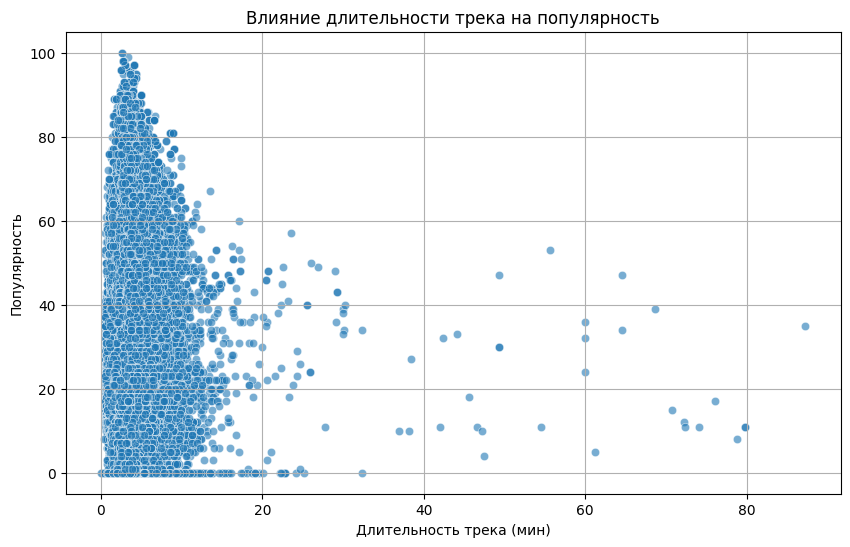

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Преобразуем длительность из миллисекунд в минуты для удобства
df['duration_min'] = df['duration_ms'] / 60000
df = df.drop(columns=['duration_ms'])

# Построим scatterplot для визуализации связи между популярностью и длительностью
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='duration_min', y='popularity', alpha=0.6)
plt.title('Влияние длительности трека на популярность')
plt.xlabel('Длительность трека (мин)')
plt.ylabel('Популярность')
plt.grid(True)
plt.show()


Исходя из графика можем понять, что наибольшую популярность имеют не длинные треки, поэтому в датасет добавим новую колонку, которая будет показывать длинее ли трек средней длины всех треков в датасете

In [4]:
# Рассчитаем среднюю длину всех треков
average_duration = df['duration_min'].mean()

# Добавим новую колонку с результатом проверки
# Если длина трека больше средней, то записываем 0, иначе 1
df['is_shorter_than_average'] = (df['duration_min'] <= average_duration).astype(int)

df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min,is_shorter_than_average
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,False,0.676,0.4610,1,...,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,3.844433,0
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,False,0.420,0.1660,1,...,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,2.493500,1
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,False,0.438,0.3590,0,...,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,3.513767,1
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,False,0.266,0.0596,0,...,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,3.365550,1
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,False,0.618,0.4430,2,...,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,3.314217,1


**Теперь мы можем предположить что на популярность трека влияет его жанр, поэтому выведем график который покажет это**

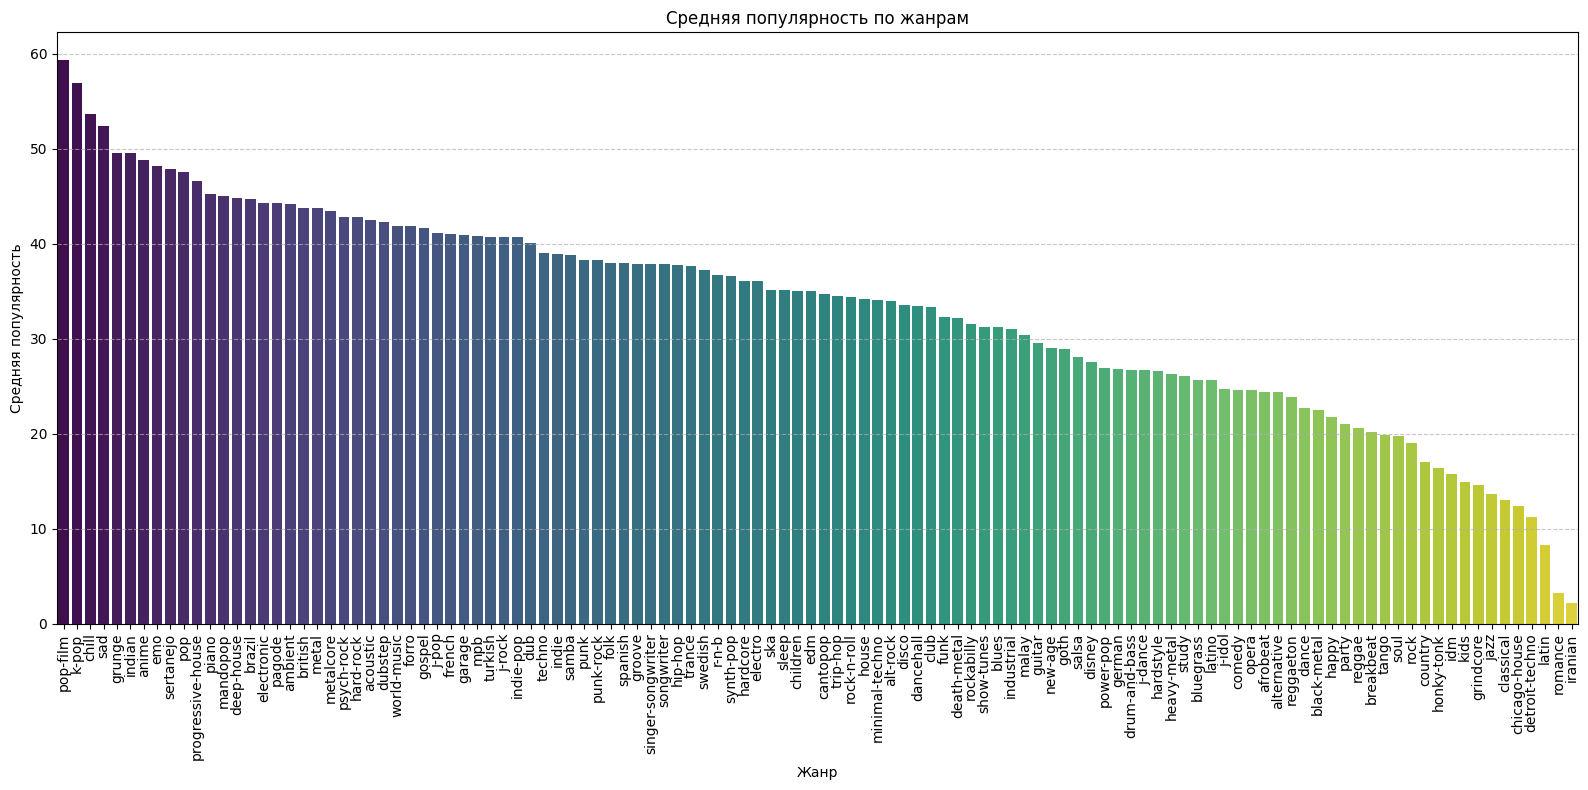

In [5]:
# Рассчитаем среднюю популярность для каждого жанра
mean_popularity_by_genre = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)

# Построим barplot
plt.figure(figsize=(16, 8))  # Увеличим размер графика для всех жанров
sns.barplot(
    x=mean_popularity_by_genre.index,
    y=mean_popularity_by_genre.values,
    palette='viridis'
)
plt.title('Средняя популярность по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Средняя популярность')
plt.xticks(rotation=90)  # Поворот жанров для удобства чтения
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Как мы видим на графике, самые популярные жанры - это pop, k-pop и chill. Поэтому создадим колонку которая будет показывать входит ли трек по жанру в топ - 10 самых популярные жанров.

In [6]:
# Рассчитаем среднюю популярность для каждого жанра
mean_popularity_by_genre = df.groupby('track_genre')['popularity'].mean()

# Выберем топ-10 самых популярных жанров
top_10_genres = mean_popularity_by_genre.sort_values(ascending=False).head(10).index

# Добавим новый столбец, который будет показывать, входит ли жанр в топ-10
df['is_top_10_genre'] = df['track_genre'].apply(lambda x: 1 if x in top_10_genres else 0)

**Предположим что у треков с более высоким темпом (tempo) и позитивным настроением (valence) популярность выше.**

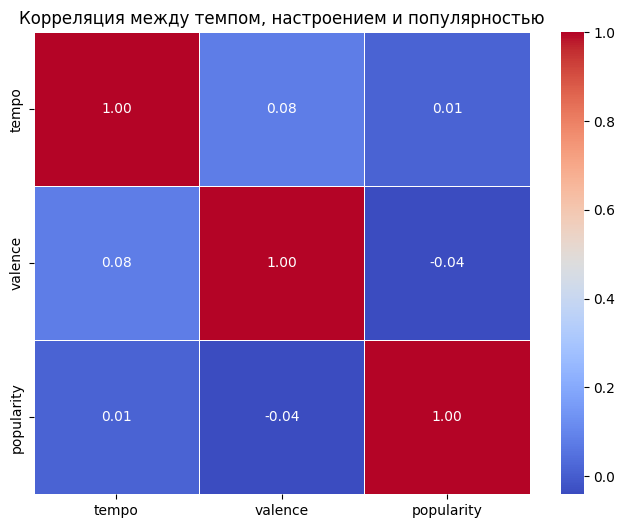

In [7]:
# Рассчитаем корреляционную матрицу для популярных признаков
correlation_matrix = df[['tempo', 'valence', 'popularity']].corr()

# Построим heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляция между темпом, настроением и популярностью')
plt.show()

Исходя из карты корреляции, можно сделать следующий вывод: Темп и настроение песни оказывают крайне незначительное влияние на её популярность. Корреляции показывают, что практически нет связи между этими переменными.

In [8]:
# Преобразуем все булевые столбцы в 0 и 1
df_cleaned = df.copy()

# Удалим столбец 'Unnamed'
df_cleaned = df_cleaned.loc[:, ~df_cleaned.columns.str.contains('^Unnamed')]

# Получим все булевые столбцы
bool_columns = df_cleaned.select_dtypes(include=['bool']).columns

# Заменяем True на 1, False на 0 для всех булевых столбцов
for col in bool_columns:
    df_cleaned[col] = df_cleaned[col].astype(int)

# Удалим все столбцы с типом 'object'
new_df = df_cleaned.select_dtypes(exclude=['object'])

# Проверим результат
new_df.head()



,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min,is_shorter_than_average,is_top_10_genre
0,73,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,3.844433,0,0
1,55,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,2.493500,1,0
2,57,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,3.513767,1,0
3,71,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,3.365550,1,0
4,82,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,3.314217,1,0


# **Построим простую модель (Линейная регрессия)**

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Разделим данные на признаки и целевую переменную
X = new_df.drop('popularity', axis=1)
y = new_df['popularity']

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучаем модель
model = LinearRegression()
model.fit(X_train, y_train)

# Прогнозируем и оцениваем модель
y_pred = model.predict(X_test)
print("Средняя абсолютная ошибка (MAE):", mean_absolute_error(y_test, y_pred))


Средняя абсолютная ошибка (MAE): 17.58522630759827


# **Деревья решений**

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score


# Инициализация модели
tree_model = DecisionTreeRegressor(random_state=42)

# Кросс-валидация и расчет MAE
tree_mae = -cross_val_score(tree_model, X, y, scoring='neg_mean_absolute_error', cv=5).mean()
print(f"Дерево решений MAE: {tree_mae}")


Дерево решений MAE: 16.549524812423783


In [11]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

# Инициализация модели
gb_model = GradientBoostingRegressor(random_state=42)

# Кросс-валидация и расчет MAE
gb_mae = -cross_val_score(gb_model, X, y, scoring='neg_mean_absolute_error', cv=3, n_jobs=-1).mean()

print(f"Градиентный бустинг MAE: {gb_mae}")


Градиентный бустинг MAE: 17.522059361797094


In [12]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

# Уменьшим количество данных (опционально)
X_sample = X.sample(frac=0.1, random_state=42)
y_sample = y.loc[X_sample.index]

# Настройка модели с более эффективными параметрами
nn_model = MLPRegressor(
    hidden_layer_sizes=(32, 32),  # Меньшее число нейронов
    max_iter=500,                # Ограничим число итераций
    solver='adam',               # Быстрый оптимизатор (по умолчанию)
    learning_rate='adaptive',    # Адаптивная скорость обучения
    random_state=42
)

# Кросс-валидация с меньшим количеством фолдов и параллельным выполнением
nn_mae = -cross_val_score(
    nn_model, 
    X_sample, 
    y_sample, 
    scoring='neg_mean_absolute_error', 
    cv=3,    # Уменьшено число фолдов
    n_jobs=-1  # Параллельные вычисления
).mean()

print(f"Нейронная сеть MAE: {nn_mae}")


Нейронная сеть MAE: 17.56862195644376


В моем случае вышло, что Дерево решений показало себя лучше остальных по тестам MAE, поэтому возьмем её и продолжим улучшать

Train Loss (MSE): 448.2659903735501
Test Loss (MSE): 449.4252832554079


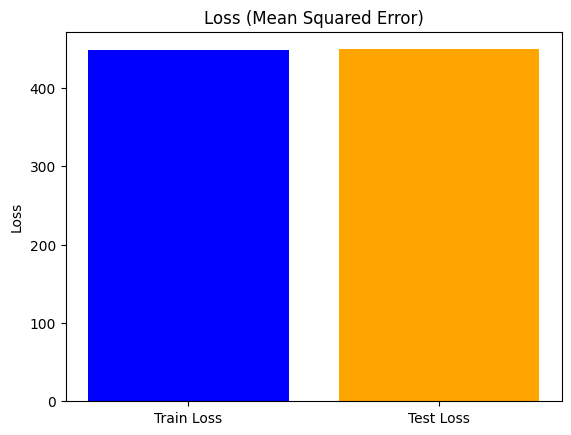

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Прогнозирование
y_train_pred = tree_model.predict(X_train)
y_test_pred = tree_model.predict(X_test)

# Расчет MSE для обучения и теста
train_loss = mean_squared_error(y_train, y_train_pred)
test_loss = mean_squared_error(y_test, y_test_pred)

print(f"Train Loss (MSE): {train_loss}")
print(f"Test Loss (MSE): {test_loss}")

# Построение графика Loss
losses = {'Train Loss': train_loss, 'Test Loss': test_loss}

plt.bar(losses.keys(), losses.values(), color=['blue', 'orange'])
plt.title('Loss (Mean Squared Error)')
plt.ylabel('Loss')
plt.show()

Близость значений Train Loss и Test Loss:
Разница между Train Loss и Test Loss очень маленькая (~1.16), что говорит о том, что модель не переобучилась. Это хороший признак.

# **Проведем кросс-валидацию**

In [14]:
# Инициализация модели
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)

# Кросс-валидация (MSE)
cv_mse_scores = -cross_val_score(tree_model, X, y, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Вычисление метрик
mean_cv_mse = np.mean(cv_mse_scores)
mean_cv_rmse = np.sqrt(mean_cv_mse)

print(f"Средний MSE на кросс-валидации: {mean_cv_mse}")
print(f"Средний RMSE на кросс-валидации: {mean_cv_rmse}")

Средний MSE на кросс-валидации: 468.7777022539437
Средний RMSE на кросс-валидации: 21.65127484131001


**Мы провели анализ данных Spotify, создали признаки, протестировали несколько моделей и выбрали дерево решений как оптимальную модель. Средний RMSE на кросс-валидации составил 21.65, что показывает умеренную точность при предсказании популярности треков**